In [1]:

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

import warnings
warnings.filterwarnings("ignore")



from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv("Edinburgh Listings Cleaned.csv")
df.head()

,Unnamed: 0,id,listing_url,scrape_id,host_id,host_name,host_since,host_location,host_about,host_response_time,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,reviews_per_month
0,0,15420,https://www.airbnb.com/rooms/15420,2.020100e+13,60423,Charlotte,6/12/2009,"Edinburgh, Scotland, United Kingdom","I have a background in property, having worked...",within an hour,...,10.0,10.0,10.0,10.0,10.0,f,1,1,0,2.84
1,1,38628,https://www.airbnb.com/rooms/38628,2.020100e+13,165635,Trish,13/07/2010,"Edinburgh, Scotland, United Kingdom",Hi \r\nI like travelling and housing projects ...,within an hour,...,9.0,10.0,10.0,10.0,10.0,t,2,2,0,0.72
2,2,44009,https://www.airbnb.com/rooms/44009,2.020100e+13,192586,Puneet,5/08/2010,"Edinburgh, Scotland, United Kingdom",I am a Management Consultant and a Creative Ph...,NaN,...,10.0,10.0,9.0,9.0,9.0,f,1,0,1,0.31
3,3,54188,https://www.airbnb.com/rooms/54188,2.020100e+13,253850,Natalie,5/10/2010,"Edinburgh, Scotland, United Kingdom","Ahoy,\r\nI am Skipper Cam, the proud owner of ...",within a day,...,9.0,9.0,9.0,10.0,9.0,t,1,1,0,0.31
4,4,55881,https://www.airbnb.com/rooms/55881,2.020100e+13,264345,Susie,17/10/2010,"London, England, United Kingdom",I am a musician and my husband is an artist. W...,within a few hours,...,10.0,10.0,10.0,10.0,10.0,f,1,1,0,2.16


In [3]:
df.tail()

,Unnamed: 0,id,listing_url,scrape_id,host_id,host_name,host_since,host_location,host_about,host_response_time,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,reviews_per_month
6430,6551,45954491,https://www.airbnb.com/rooms/45954491,2.020100e+13,372306305,Dongquan,17/10/2020,GB,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,t,5,0,5,0.0
6431,6552,45954492,https://www.airbnb.com/rooms/45954492,2.020100e+13,372306305,Dongquan,17/10/2020,GB,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,t,5,0,5,0.0
6432,6553,45956096,https://www.airbnb.com/rooms/45956096,2.020100e+13,313086955,Raymond,29/11/2019,"Edinburgh, Scotland, United Kingdom",NaN,within an hour,...,0.0,0.0,0.0,0.0,0.0,f,2,0,2,0.0
6433,6554,45967573,https://www.airbnb.com/rooms/45967573,2.020100e+13,2989965,Ocean Serviced Apartments,19/07/2012,"Edinburgh, Scotland, United Kingdom","Hi, We are Ocean Serviced Apartments.\r\nWe ha...",within a few hours,...,0.0,0.0,0.0,0.0,0.0,t,6,4,0,0.0
6434,6555,45967810,https://www.airbnb.com/rooms/45967810,2.020100e+13,262945149,Daria,20/05/2019,GB,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,f,1,0,1,0.0


In [4]:
df.info

<bound method DataFrame.info of       Unnamed: 0        id                            listing_url  \
0              0     15420     https://www.airbnb.com/rooms/15420   
1              1     38628     https://www.airbnb.com/rooms/38628   
2              2     44009     https://www.airbnb.com/rooms/44009   
3              3     54188     https://www.airbnb.com/rooms/54188   
4              4     55881     https://www.airbnb.com/rooms/55881   
...          ...       ...                                    ...   
6430        6551  45954491  https://www.airbnb.com/rooms/45954491   
6431        6552  45954492  https://www.airbnb.com/rooms/45954492   
6432        6553  45956096  https://www.airbnb.com/rooms/45956096   
6433        6554  45967573  https://www.airbnb.com/rooms/45967573   
6434        6555  45967810  https://www.airbnb.com/rooms/45967810   

         scrape_id    host_id                  host_name  host_since  \
0     2.020100e+13      60423                  Charlotte   6/12/200

In [5]:
df.dtypes

Unnamed: 0                                        int64
id                                                int64
listing_url                                      object
scrape_id                                       float64
host_id                                           int64
                                                 ...   
instant_bookable                                 object
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
reviews_per_month                               float64
Length: 62, dtype: object

In [6]:
df.shape

(6435, 62)

In [7]:
df.describe()

,Unnamed: 0,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,reviews_per_month
count,6435.000000,6.435000e+03,6.435000e+03,6.435000e+03,6435.000000,6435.000000,0.0,6435.000000,6435.000000,6435.000000,...,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,3257.316239,2.370736e+07,2.020100e+13,9.601440e+07,12.131469,12.131469,NaN,55.950677,-3.198418,3.553225,...,8.489355,8.339860,8.529293,8.532090,8.451282,8.259363,5.724786,4.390676,1.173582,1.549049
std,1890.395804,1.297867e+07,0.000000e+00,9.537056e+07,65.862111,65.862111,NaN,0.015842,0.037852,2.065320,...,3.361312,3.323594,3.368130,3.369166,3.340055,3.290658,16.008030,14.964614,3.465113,1.788740
min,0.000000,1.542000e+04,2.020100e+13,3.629800e+04,0.000000,0.000000,NaN,55.858160,-3.418760,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1621.500000,1.368943e+07,2.020100e+13,1.851542e+07,1.000000,1.000000,NaN,55.942620,-3.212515,2.000000,...,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.000000,0.000000,0.210000
50%,3243.000000,2.421572e+07,2.020100e+13,5.832906e+07,1.000000,1.000000,NaN,55.951250,-3.193650,3.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,0.000000,0.900000
75%,4887.500000,3.521951e+07,2.020100e+13,1.514801e+08,4.000000,4.000000,NaN,55.960230,-3.178140,4.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,3.000000,2.000000,1.000000,2.340000
max,6555.000000,4.596781e+07,2.020100e+13,3.723080e+08,1490.000000,1490.000000,NaN,55.991560,-3.078950,16.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,113.000000,105.000000,39.000000,31.030000


In [8]:
df.describe(include=['O'])

,listing_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,...,neighbourhood,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,first_review,last_review,instant_bookable
count,6435,6435,6435,6418,3861,4766,4766,5651,6435,3620,...,4911,6435,6435,6435,6428,6435,6435,5668,5668,6435
unique,6435,1857,2209,365,2462,4,36,78,2,31,...,89,111,48,4,28,6191,1,1771,708,2
top,https://www.airbnb.com/rooms/29326751,Altido,5/07/2015,"Edinburgh, Scotland, United Kingdom","Dear guest, welcome to an ALTIDO/BNB Buddy ho...",within an hour,100%,100%,f,Leith,...,"Edinburgh, Scotland, United Kingdom","Old Town, Princes Street and Leith Street",Entire apartment,Entire home/apt,1 bath,"[""Elevator"", ""Long term stays allowed"", ""Bed l...",t,11/08/2019,1/01/2020,t
freq,1,113,116,4542,113,3479,3725,2604,3827,771,...,3668,760,3588,4150,3083,25,6435,34,157,3575


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 62 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    6435 non-null   int64  
 1   id                                            6435 non-null   int64  
 2   listing_url                                   6435 non-null   object 
 3   scrape_id                                     6435 non-null   float64
 4   host_id                                       6435 non-null   int64  
 5   host_name                                     6435 non-null   object 
 6   host_since                                    6435 non-null   object 
 7   host_location                                 6418 non-null   object 
 8   host_about                                    3861 non-null   object 
 9   host_response_time                            4766 non-null   o

In [10]:
df_data = df.replace('?',np.NAN) 
df_data.isnull().sum()

Unnamed: 0                                      0
id                                              0
listing_url                                     0
scrape_id                                       0
host_id                                         0
                                               ..
instant_bookable                                0
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
reviews_per_month                               0
Length: 62, dtype: int64

In [11]:
df.columns

Index(['Unnamed: 0', 'id', 'listing_url', 'scrape_id', 'host_id', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_

In [12]:
df.drop('scrape_id', axis=1, inplace=True)

In [14]:
df.drop('picture_url', axis=1, inplace=True)

KeyError: "['picture_url'] not found in axis"

In [ ]:
df.drop('host_url', axis=1, inplace=True)

In [ ]:
df.drop('host_about', axis=1, inplace=True)

In [ ]:
df.drop('host_thumbnail_url', axis=1, inplace=True)

In [ ]:
df.drop('host_picture_url', axis=1, inplace=True)

In [ ]:
df.drop('calendar_updated', axis=1, inplace=True)

In [ ]:
df.drop('license', axis=1, inplace=True)

In [ ]:
df.drop('calculated_host_listings_count_shared_rooms', axis=1, inplace=True)

In [ ]:
df.drop('calendar_last_scraped', axis=1, inplace=True)

In [ ]:
df.drop('name', axis=1, inplace=True)

In [ ]:
df.drop('description', axis=1, inplace=True)

In [ ]:
df.drop('neighborhood_overview', axis=1, inplace=True)

In [ ]:
df.drop('host_verifications', axis=1, inplace=True)

In [ ]:
df.drop('neighbourhood_group_cleansed', axis=1, inplace=True)

In [ ]:
df.drop('host_response_time', axis=1, inplace=True)

In [ ]:
df.drop('host_response_rate', axis=1, inplace=True)

In [ ]:
df.drop('host_acceptance_rate', axis=1, inplace=True)

In [ ]:
df.drop('neighbourhood', axis=1, inplace=True)

In [ ]:
df.drop('bathrooms', axis=1, inplace=True)

In [ ]:
df.drop('host_has_profile_pic', axis=1, inplace=True)

In [ ]:
df.drop('host_identity_verified', axis=1, inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6435 entries, 2020-08-10 to NaT
Data columns (total 60 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    6435 non-null   int64  
 1   id                                            6435 non-null   int64  
 2   listing_url                                   6435 non-null   object 
 3   host_id                                       6435 non-null   int64  
 4   host_name                                     6435 non-null   object 
 5   host_since                                    6435 non-null   object 
 6   host_location                                 6418 non-null   object 
 7   host_about                                    3861 non-null   object 
 8   host_response_time                            4766 non-null   object 
 9   host_response_rate                            4766 n

In [17]:
df['last_review'] = pd.to_datetime(df['last_review'])
df.set_index(keys=['last_review'], inplace=True)

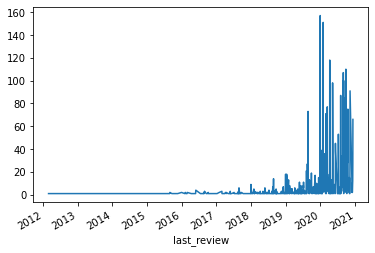

In [19]:
df.groupby(df.index).size().plot();

In [20]:
def generateBaseMap(default_location=[40.693943, -73.985880], default_zoom_start=12):
    '''
    Create a base map
    '''
    base_map = folium.Map(
        location = default_location
        , control_scale = True
        , zoom_start = default_zoom_start
    )
    
    return base_map

In [21]:
df.head(10)

,Unnamed: 0,id,listing_url,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,reviews_per_month
last_review,,,,,,,,,,,,,,,,,,,,,
2020-08-10,0,15420,https://www.airbnb.com/rooms/15420,60423,Charlotte,6/12/2009,"Edinburgh, Scotland, United Kingdom","I have a background in property, having worked...",within an hour,100%,...,10.0,10.0,10.0,10.0,10.0,f,1,1,0,2.84
2020-04-09,1,38628,https://www.airbnb.com/rooms/38628,165635,Trish,13/07/2010,"Edinburgh, Scotland, United Kingdom",Hi \r\nI like travelling and housing projects ...,within an hour,100%,...,9.0,10.0,10.0,10.0,10.0,t,2,2,0,0.72
2013-08-23,2,44009,https://www.airbnb.com/rooms/44009,192586,Puneet,5/08/2010,"Edinburgh, Scotland, United Kingdom",I am a Management Consultant and a Creative Ph...,NaN,NaN,...,10.0,10.0,9.0,9.0,9.0,f,1,0,1,0.31
2020-12-10,3,54188,https://www.airbnb.com/rooms/54188,253850,Natalie,5/10/2010,"Edinburgh, Scotland, United Kingdom","Ahoy,\r\nI am Skipper Cam, the proud owner of ...",within a day,80%,...,9.0,9.0,9.0,10.0,9.0,t,1,1,0,0.31
2020-09-23,4,55881,https://www.airbnb.com/rooms/55881,264345,Susie,17/10/2010,"London, England, United Kingdom",I am a musician and my husband is an artist. W...,within a few hours,100%,...,10.0,10.0,10.0,10.0,10.0,f,1,1,0,2.16
2020-08-31,5,58682,https://www.airbnb.com/rooms/58682,281109,Rona,8/11/2010,"Edinburgh, Scotland, United Kingdom","I have lived in Edinburgh for nearly 30 years,...",within an hour,100%,...,10.0,10.0,10.0,10.0,10.0,t,4,4,0,3.30
2020-09-22,6,74877,https://www.airbnb.com/rooms/74877,394949,Derek,16/02/2011,"New York, New York, United States",I have a beautiful apartment with a great roof...,within an hour,100%,...,9.0,10.0,10.0,10.0,9.0,f,1,1,0,0.91
2020-10-19,7,85620,https://www.airbnb.com/rooms/85620,334208,Carrie,3/01/2011,"Edinburgh, Scotland, United Kingdom","Originally from the States, I'm an avid travel...",within an hour,100%,...,0.0,0.0,0.0,0.0,0.0,t,1,1,0,4.07
2020-09-13,8,93904,https://www.airbnb.com/rooms/93904,502783,Brett,12/04/2011,"London, England, United Kingdom",I'm Scottish/Thai. Grew up in Thailand and liv...,within an hour,100%,...,10.0,10.0,10.0,10.0,10.0,f,1,0,1,4.18


In [22]:
for i in range(0, 10):
    print([df.iloc[i]['latitude'], df.iloc[i]['longitude']], df.iloc[i]['room_type'])

[55.95689, -3.18768] Entire home/apt
[55.94215, -3.0964] Entire home/apt
[55.93812, -3.19423] Private room
[55.94217, -3.20863] Entire home/apt
[55.95935, -3.17713] Entire home/apt
[55.95471, -3.21612] Entire home/apt
[55.97738, -3.1806400000000004] Entire home/apt
[55.96252, -3.17595] Entire home/apt
[55.94571, -3.2189] Private room
[55.93051, -3.21063] Entire home/apt


In [23]:
# ANSWER

# Make an empty map
ED_location = [55.953251, -3.188267]
m = generateBaseMap(default_location=ED_location)

# I can add marker one by one on the map
for i in range(0, len(df.head(100))):
    folium.Marker(location=[df.iloc[i]['latitude'], df.iloc[i]['longitude']], popup=df.iloc[i]['room_type']).add_to(m)

# Show the map
m

In [24]:
m.save('ED_AirBNB_Listings.html')

In [25]:
baseMap = folium.Map(location=[55.953251, -3.188267])
# I can add marker one by one on the map
for i in range(0, len(df.head(100))):
    folium.Circle(
        location=[df.iloc[i]['latitude'], df.iloc[i]['longitude']]
        , radius=50
    ).add_to(baseMap)
display(baseMap)